# MLP Feed Forward Neural Network (FFNN)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the data
X = ... # This is the Features
y = ... # This is the Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing of data to be on a similar scale [0 - 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the neural network
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
clf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


1. This code first loads the tabular data and splits it into input features (X) and target values (y). 
2. It then splits the data into training and testing sets using train_test_split. 
3. it normalizes the input features using StandardScaler, which scales the features to have a mean of 0 and a standard deviation of 1,  to bring down all the features to a common scale without distorting the differences in the range of the values. if we don't normalize the machine learning algorithm will be dominated by the variables that use a larger scale, adversely affecting model performance
4. it defines a multi-layer perceptron (MLP) classifier with a single hidden layer of 100 neurons and a maximum of 500 iterations. Finally, it trains the model on the training data and evaluates its performance on the testing data by computing the accuracy of the predictions.


# Custom MLP


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the data
X = ... # This is the Features
y = ... # This is the Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing of data to be on a similar scale [0 - 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the custom neural network using Built-in MLP
clf = MLPClassifier(hidden_layer_sizes=(100,), 
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001, 
                    batch_size='auto', 
                    learning_rate='constant', 
                    learning_rate_init=0.001, 
                    power_t=0.5, max_iter=500, 
                    shuffle=True, 
                    random_state=None, 
                    tol=0.0001, 
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, 
                    nesterovs_momentum=True, 
                    early_stopping=False, 
                    validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, 
                    n_iter_no_change=10, 
                    max_fun=15000)

clf.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


In this code, we modified the default MLPClassifier by specifying several hyperparameters. For example, we changed the activation function to ReLU, the solver to Adam, and set the learning rate to a constant value of 0.001. We also added momentum to help speed up the convergence of the optimizer and set nesterovs_momentum to True to enable Nesterov’s momentum.


# Custom MLP using Sequential Model of Keras

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the data
X = ... # This is the Features
y = ... # This is the Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing of data to be on a similar scale [0 - 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

################################## MODEL #######################################

model = Sequential()
model.add(Dense(100, input_dim=train_X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

################################################################################

# Training (Higher Epoch Means total number of iterations of all the training 
# data in one cycle, adjust if necessary)
# Batch size - the number of training examples utilized in one iteration, 
# adjust if necessary

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the performance of the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


In this code, we used the Keras Sequential model to define the MLP architecture. We added two dense layers to the model, one with 100 neurons and a ReLU activation function, and another with a single neuron and a sigmoid activation function. We used binary cross-entropy as the loss function and the Adam optimizer.




## Recommendation to Increase Accuracy

Recommendations for modifying an MLP model to improve its accuracy:

1. Increase the number of neurons in the hidden layers: The more neurons you have, the more complex the model can be and the more non-linear relationships it can capture. However, adding too many neurons can lead to overfitting, so it's important to find the right balance.

2. Add more layers to the model: Adding additional hidden layers can also increase the model's complexity and ability to capture non-linear relationships in the data. However, as with adding neurons, adding too many layers can lead to overfitting.

3. Try different activation functions: The choice of activation function can have a big impact on the model's performance. Common activation functions include ReLU, sigmoid, and tanh. Try experimenting with different activation functions to see which works best for your data.

4. Adjust the learning rate: The learning rate controls the step size that the optimizer takes during training. A higher learning rate can lead to faster convergence, but it can also cause the optimizer to overshoot the minimum and lead to unstable training. Conversely, a lower learning rate can lead to slower convergence but more stable training. Experiment with different learning rates to find the optimal value for your model.

5. Regularize the model: Regularization techniques, such as L1, L2, or dropout regularization, can help prevent overfitting and improve the generalization performance of the model.

6. Tune hyperparameters: There are many hyperparameters in an MLP model that can be tuned, such as the number of neurons, the number of layers, the learning rate, the batch size, and the optimizer. Use techniques such as grid search or random search to find the optimal combination of hyperparameters for your data.

7. Increase the amount of training data: More training data can help the model learn more about the underlying patterns in the data and improve its ability to generalize to new examples.

The modification of Model depends of your data that you are working with. It will take some experimentation, trial and error to find the best or optimal configuration for your model.


## Using The Recommendation Above

Recommendation that were applied to the model below

1. Increase the number of neurons in the first hidden layer from 32 to 64.
2. Add a dropout layer after each hidden layer with a dropout rate of 0.5.
3. Use L2 regularization with a coefficient of 0.01 on the kernel weights of the hidden layers.
4. Use the Adam optimizer with a learning rate of 0.001.
5. Increase the number of epochs from 50 to 100 and use a smaller batch size of 32.

### SAMPLE Using Iris dataset

Epoch 1/10
8/8 [==============================] - 1s 30ms/step - loss: 1.2311 - accuracy: 0.5167 - val_loss: 0.6902 - val_accuracy: 0.7667
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.7870 - accuracy: 0.6833 - val_loss: 0.4722 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.6020 - accuracy: 0.7917 - val_loss: 0.3761 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.5435 - accuracy: 0.8333 - val_loss: 0.2605 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.4629 - accuracy: 0.8500 - val_loss: 0.2663 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.9250 - val_loss: 0.1861 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.8667 - val_loss: 0.2669 - val_accuracy: 0.9000
Epoch 8/10
8/8 [================

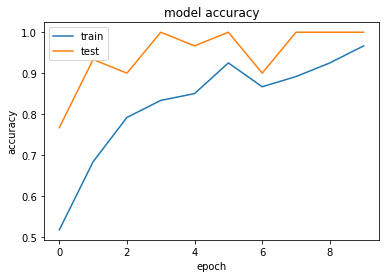

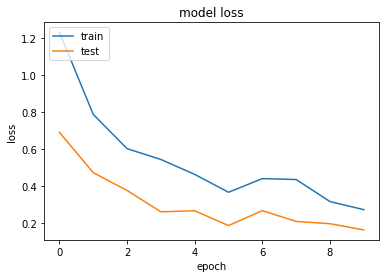

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam
import tensorflow as tf

# Load the data
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing of data to be on a similar scale [0 - 1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

################################## MODEL #######################################
# This is a Sample model of Customized MLP using the Sequential of Keras With Drop 
# -- out regularization
# 1. Adjust Dropout if Necesarry (higher means More nuerons are to be temp. 
# -- ignored while training) (This Prevents Overfitting)
# 2. Adjust Regularizer if Necessary (This minimize the adjusted loss function)
# 3. For number of Nuerons Either you'll use Decreasing or Increasing style, 
# -- in this case Increasing Style, Starting with 32
# -- You can add more layers if Necessary (power of 2)

model = Sequential()
# Layer 1
model.add(Dense(32, 
                activation='relu', 
                input_dim=X_train.shape[1], 
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.5))

# Layer 2
model.add(Dense(32, 
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))

model.add(Dropout(0.5))

# Layer 3
model.add(Dense(64, activation='relu'))

# Layer 4
model.add(Dense(128, activation='relu'))

# Final Layer
# Note 3 Nueron at the End, since iris has 3 classes
model.add(Dense(3, activation='softmax'))

# Set the optimizer with a customized Learning Rate (Higher Means Faster 
# Convergence [Not Recommended, default is 0.001])
adam = Adam(learning_rate=0.01)

# Compile the model (if two class Binary Crossentropy = two exclusive classes)
# change the last nueron to 1 because its either 0 or 1
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

################################################################################

# Training (Higher Epoch Means total number of iterations of all the training 
# data in one cycle, adjust if necessary)
# Batch size - the number of training examples utilized in one iteration, 
# adjust if necessary
history = model.fit(X_train, y_train, 
                    epochs=10, batch_size=16, 
                    validation_data=(X_test, y_test),
                    verbose = 1)

# Evaluation of Model Using the Test Set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Plot The Model History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 32)                160       
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_107 (Dense)           (None, 32)                1056      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_108 (Dense)           (None, 64)                2112      
                                                                 
 dense_109 (Dense)           (None, 128)               8320      
                                                                 
 dense_110 (Dense)           (None, 3)               

NOTES:

The output layer has been modified to have 3 neurons and use the softmax activation function since the Iris dataset has 3 classes therefore the loss function has been changed to sparse_categorical_crossentropy to handle the multi-class classification problem.


Achieving a loss of 0.13 and an accuracy of 1.00 on a test set generally indicates that the model is performing very well on the given dataset. However, it's important to keep in mind that these metrics only provide a limited view of the model's performance, and that the evaluation results may not generalize to other datasets.

To get a better sense of the model's performance, you could also look at metrics such as precision, recall, and F1 score, particularly if the dataset is imbalanced or the cost of false positives and false negatives is different. Additionally, it's always a good idea to cross-validate the model to get a more robust estimate of its performance.

In machine learning, "loss" refers to the difference between the predicted output of a model and the true output. It is a measure of how well the model is able to make predictions on the given data.

The goal of training a machine learning model is to minimize the loss, which means that the model is making more accurate predictions. This is typically done using an optimization algorithm such as gradient descent, which adjusts the parameters of the model to minimize the loss.

The specific loss function used in a model depends on the problem being solved. For example, in a regression problem, the mean squared error (MSE) loss function is commonly used. In a classification problem, the cross-entropy loss function is often used. The choice of loss function depends on the specific problem and the nature of the data.